In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io.fits import getheader
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import mpyfit
from astropy.io import fits
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import csv
import pickle
import math as m
import os

In [2]:
image3_29_16 = plt.imread("../SDO_HMI/20160329_163000_1024_HMIIC.jpg")
image3_13_17 = plt.imread("../SDO_HMI/20170313_064500_1024_HMIIC.jpg")
image_diff = image3_29_16 - image3_13_17

In [2]:
file_name_list = os.listdir("img")
print(len(file_name_list))

282


In [3]:
file_name_list = ["20150729_130000_512_HMIB.jpg", "20150730_141500_512_HMIB.jpg", "20150730_141500_512_HMIB.jpg",
                 "20150731_033000_512_HMIB.jpg", "20150731_164500_512_HMIB.jpg"]
file_name2 = "20150730_141500_512_HMIB.jpg"

first8char = file_name[0:8]


NameError: name 'file_name' is not defined

In [4]:
file_name_list_one_per_day = []

for i in np.arange(0, len(file_name_list)):
    first8char = file_name_list[i][0:8]
    if i == 0:
        file_name_list_one_per_day.append(file_name_list[i])
        print(first8char)
    #first8char = file_name_list[i]
    elif i > 0 and i != len(file_name_list):
        print(first8char)
        first8char2 = file_name_list[i-1][0:8]
        print("char2: "+str(first8char2))
        if first8char == first8char2:
            print("skip: "+str(first8char))
            continue
        else:
            file_name_list_one_per_day.append(file_name_list[i])

20150729
20150730
char2: 20150729
20150730
char2: 20150730
skip: 20150730
20150731
char2: 20150730
20150731
char2: 20150731
skip: 20150731


In [5]:
len(file_name_list)

5

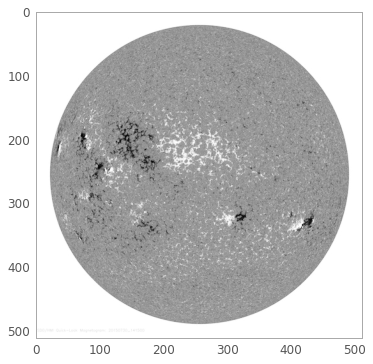

In [6]:
for i in np.arange(0, 2): #len(file_name_list_one_per_day)):
    image_test = plt.imread("img/"+file_name_list_one_per_day[i])
    plt.imshow(image_test, cmap='Greys')
    plt.grid(False)

In [7]:
len(file_name_list_one_per_day)

3

In [8]:
plt.imshow(image3_29_16)

NameError: name 'image3_29_16' is not defined

In [9]:
plt.imshow(image3_13_17)

NameError: name 'image3_13_17' is not defined

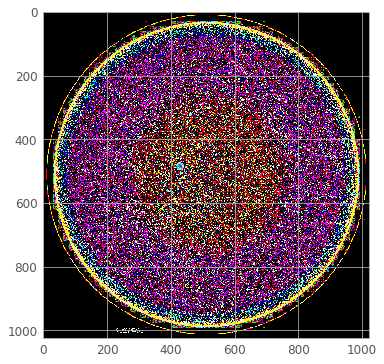

In [5]:
plt.imshow(image_diff)

In [6]:
image3_29_16_bw = plt.imread("../SDO_HMI/20160329_105839_1024_HMII_bw.jpg")
image3_13_17_bw = plt.imread("../SDO_HMI/20170313_115238_1024_HMII_bw.jpg")
image_diff_bw = image3_29_16_bw - image3_13_17_bw

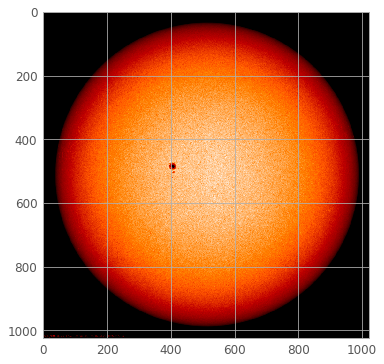

In [7]:
plt.imshow(image3_29_16_bw)


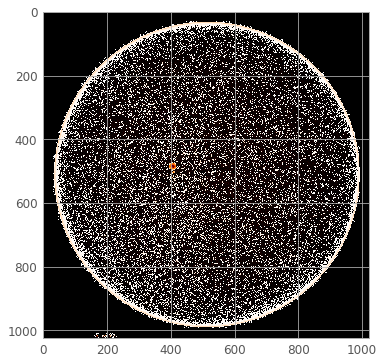

In [8]:
plt.imshow(image_diff_bw)

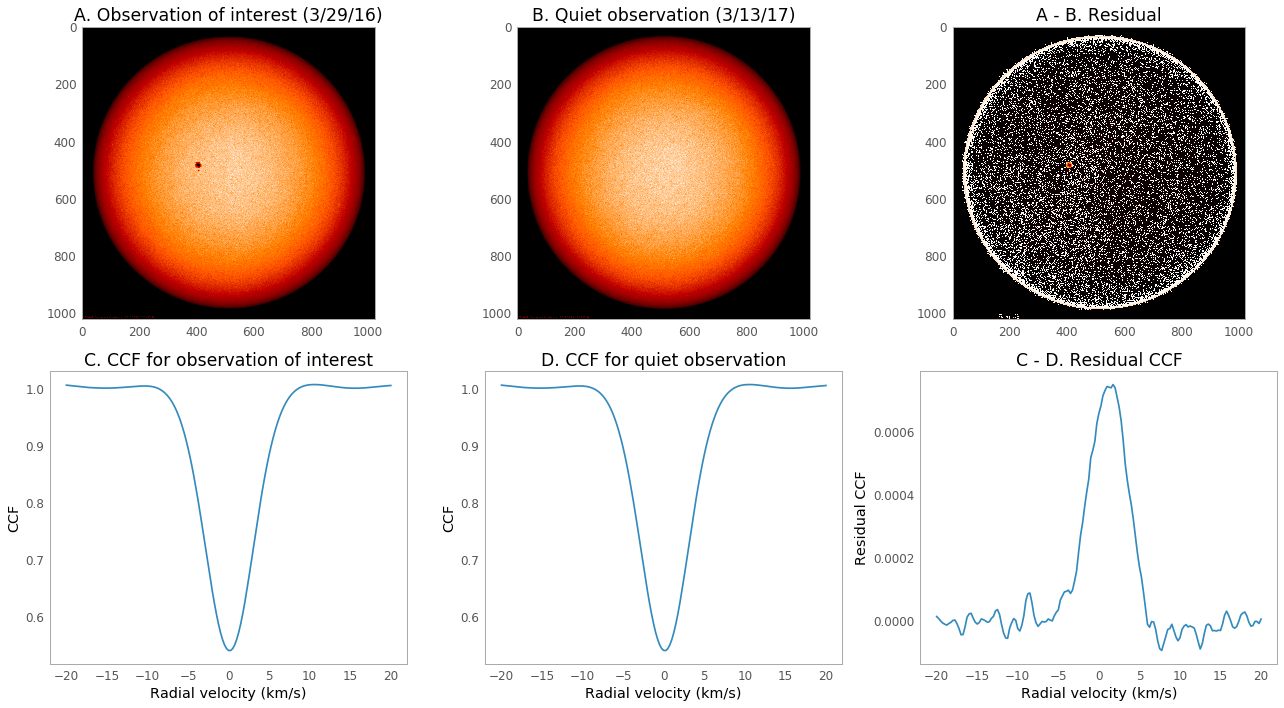

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
ax = axes[0][0]
ax.imshow(image3_29_16_bw)
ax.grid(False)
ax.set_title("A. Observation of interest (3/29/16)")

ax1 = axes[0][1]
ax1.imshow(image3_13_17_bw)
ax1.grid(False)
ax1.set_title("B. Quiet observation (3/13/17)")

ax2 = axes[0][2]
ax2.imshow(image_diff_bw)
ax2.grid(False)
ax2.set_title("A - B. Residual")

ax3 = axes[1][0]
rv_data = np.linspace(-20, 20, 161)
ax3.plot(rv_data,CCF_array_all[140])
ax3.set_ylabel("CCF")
ax3.set_xlabel("Radial velocity (km/s)")
ax3.grid(False)
ax3.set_title("C. CCF for observation of interest")

ax4 = axes[1][1]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_quiet)
ax4.set_ylabel("CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("D. CCF for quiet observation")

ax4 = axes[1][2]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[140]-CCF_quiet)
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("C - D. Residual CCF")

plt.tight_layout()



In [10]:
rv_non_zero_list = []
mu_og_fit_list = []
mu_jup_fit_list = []
mu_zero_fit_list = []
n_iters_fit_list = []
A_fit_list = []
sigma_fit_list = []
offset_fit_list = []
BJD_list = []

v_true_centered_list = []

CCF_array_all = []
residuals_all = []
soap_residuals_all = []
headr_all = []
index_number = 0
index = np.arange(0,629,1)

In [11]:
for i in index:
                #for k in [0.0, 0.25,0.5, 0.75]:
                # opens data that includes planet shifts, disable this if you open the other files below
                hdul = fits.open('shifted_fits_more_header_info_jul18/ccf' + str(i) + '_PSI_.fits', memmap=False)
                #hdul_original = fits.open('Training_set_May23/fits_long_lat_size/ccf' + str(i) + '_PSI=0.000.fits')
                hdul_zero = fits.open('shifted_fits_more_header_info_jul18/ccf527_PSI_.fits', memmap=False)
                hdul_quiet = fits.open('shifted_fits_more_header_info_jul18/ccf366_PSI_.fits', memmap=False)
                hdul_soap_zero = fits.open('../June_1_20_Complex_Training/shifted_fits/ccf17228_PSI_0.0_.fits', memmap=False)

                # extracts activity signal and rv_data
                act_signal = hdul[0].header['label']

                #if i % 10 == 0:
                #    print(act_signal)

                mu_jup_fit = hdul[0].header['MU_jup']
                mu_zero_fit = hdul[0].header['MU_zero']
                mu_og_fit = hdul[0].header['MU_og']
                n_iters_fit = hdul[0].header['N_iters']
                A_fit = hdul[0].header['Amp']
                sigma_fit = hdul[0].header['sigma']
                offset_fit = hdul[0].header['offset']
                BJD = hdul[0].header['BJD']

                rv_data = hdul[2].data
                #CCF_data_original = hdul_original[0].data
                CCF_data_zero = hdul_zero[2].data
                soap_rv_data = np.linspace(-20, 20, 401)
                rv_data_harps = np.linspace(-20, 20, 161)
                CCF_data_soap_zero = hdul_soap_zero[2].data["CCF data"]
                CCF_quiet = hdul_quiet[2].data["CCF data"]
                bjd_quiet = hdul_quiet[0].header['BJD']
                
                
                #fit to soap data and make an array that is is 161 long rather than 401
                f = interp1d(soap_rv_data, CCF_data_soap_zero, kind='cubic', fill_value='extrapolate')
                soap_shifted_zero_CCF_data = f(rv_data_harps)
                

                if act_signal == 0.0:
                    continue

                rv_non_zero_list.append(act_signal)
                mu_og_fit_list.append(mu_og_fit)
                mu_jup_fit_list.append(mu_jup_fit)
                mu_zero_fit_list.append(mu_zero_fit)
                n_iters_fit_list.append(n_iters_fit)
                A_fit_list.append(A_fit)
                sigma_fit_list.append(sigma_fit)
                offset_fit_list.append(offset_fit)
                BJD_list.append(BJD)


                #print(len(rv_non_zero_list))
                '''#finds the ground truth rv
                rv_data = hdul[2].data
                v_true = hdul[1].header['PLANET_S']
                v_obs = hdul[1].header['PLANET_S'] + hdul[1].header['RV']
                v_obs_centered = 0
                v_true_centered = v_true - v_obs
                soap_header = hdul[1].header['RV']
                shift = hdul[1].header['PLANET_S']
                v_true_centered_list.append(v_true_centered)
                # print(shift)'''

                #extracts all info from the header
                headr = hdul[1].header.copy()

                #creates arrays where we can store the data to put into the example
                rv_array = rv_data["RV data"]
                CCF_array = rv_data["CCF data"]
                CCF_data_zero = CCF_data_zero["CCF data"]
                #CCF_data_soap_zero = CCF_data_soap_zero["CCF data"]
                residual_list = CCF_array - CCF_data_zero
                soap_residual_list = CCF_array - soap_shifted_zero_CCF_data

                CCF_array_all.append(CCF_array)
                residuals_all.append(residual_list)
                soap_residuals_all.append(soap_residual_list)
                headr_all.append(headr)

                hdul.close()
                hdul_zero.close()

In [12]:
date_of_interest = 57352.093750

for i in range(0, len(BJD_list)):
    if BJD_list[i] > date_of_interest-1 and BJD_list[i]<date_of_interest+1:
        print(i)
        print(BJD_list[i])

65
57352.09436068073
66
57353.06280999883


(-0.0005, 0.002)

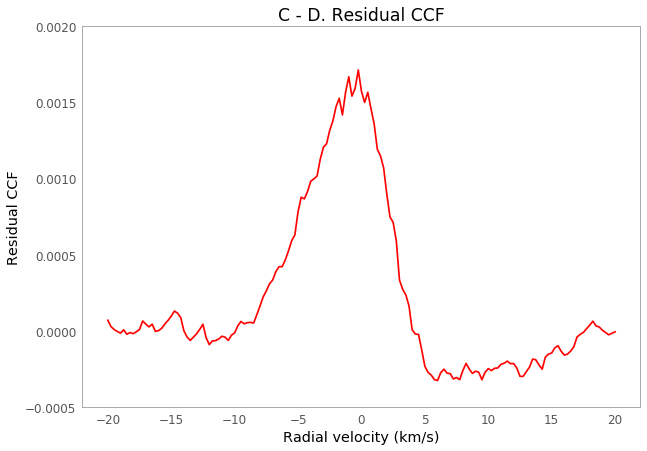

In [15]:
j = 65

fig, ax = plt.subplots(figsize=(10, 7))
rv_data = np.linspace(-20, 20, 161)
ax.plot(rv_data,CCF_array_all[j]-CCF_array_all[544], color= colors[j])
ax.set_ylabel("Residual CCF")
ax.set_xlabel("Radial velocity (km/s)")
ax.grid(False)
ax.set_title("C - D. Residual CCF")
ax.set_ylim(-0.0005, 0.002)


In [16]:
BJD_list[140] #March 29, 2016

57477.00402127536

In [17]:
BJD_list[544]

58207.00862658179

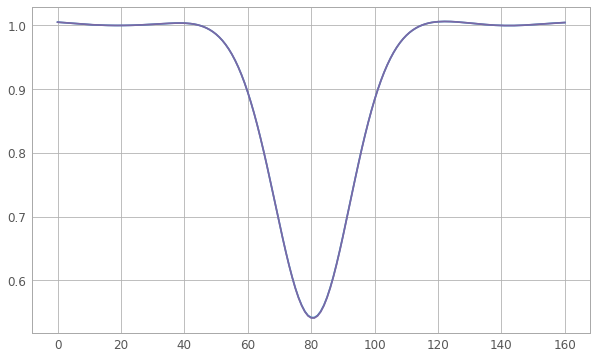

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(CCF_array_all[140])
ax.plot(CCF_quiet)

In [20]:
from PIL import Image
from PIL import ImageChops
from math import sqrt

image3_29_16_bw = Image.open("../SDO_HMI/20160329_105839_1024_HMII_bw.jpg")
image3_29_16_bw_L = image3_29_16_bw.convert('L')
image3_13_17_bw = Image.open("../SDO_HMI/20170313_115238_1024_HMII_bw.jpg")
image3_13_17_bw_L = image3_13_17_bw.convert('L')


image20170313_bw = Image.open("../SDO_HMI/20170313_144500_1024_HMIB.jpg")
image20170313_bw_L = image20170313_bw.convert('L')
#image_diff_bw = image3_29_16_bw_L - image3_29_16_bw_L

# Calculate difference
image_diff_bw = ImageChops.subtract(image20180329_bw_L, image3_29_16_bw_L)

# Check that the original + diff = image 2
newimage3_13_17_bw_L = ImageChops.add(image3_29_16_bw_L, image_diff_bw)

NameError: name 'image20180329_bw_L' is not defined

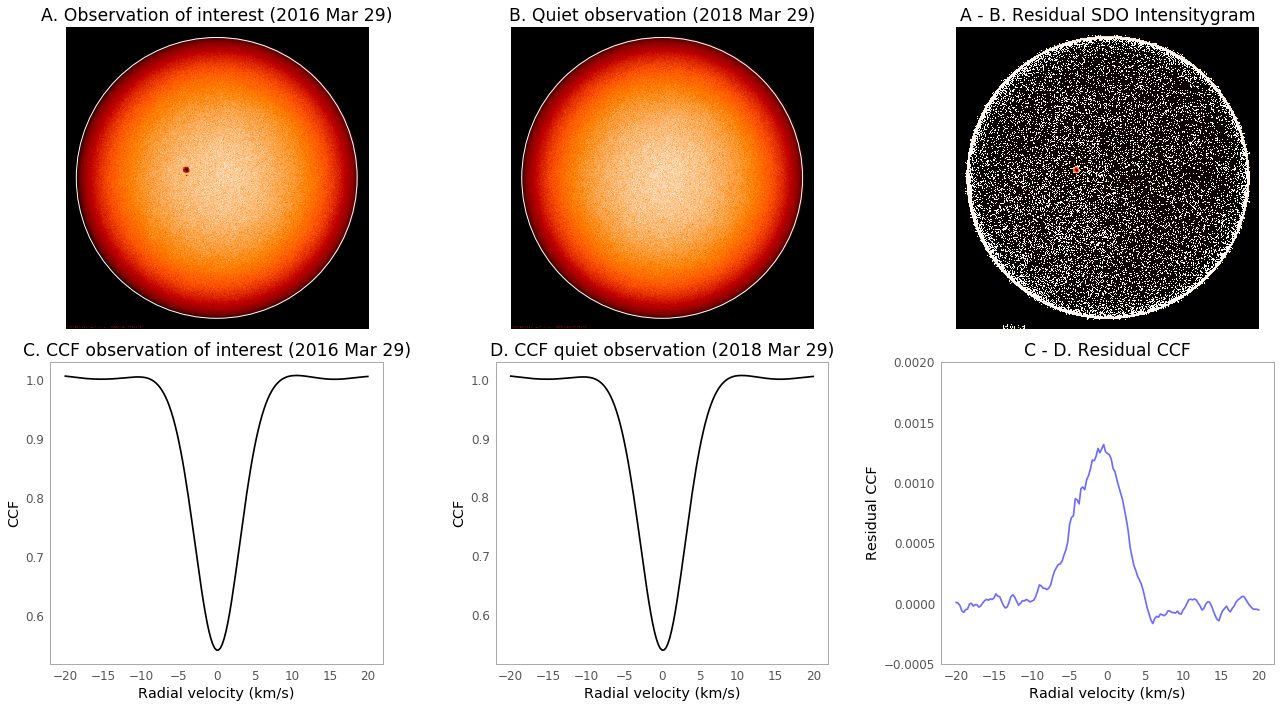

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
ax = axes[0][0]
ax.imshow(image3_29_16_bw_L)
circle1 = plt.Circle((512, 512), 476, color='w', fill=False)
ax.add_artist(circle1)
ax.grid(False)
ax.axis('off')
ax.set_title("A. Observation of interest (2016 Mar 29)")

ax1 = axes[0][1]
ax1.imshow(image3_13_17_bw_L)
circle2 = plt.Circle((512, 512), 476, color='w', fill=False)
ax1.add_artist(circle2)
ax1.grid(False)
ax1.axis('off')
ax1.set_title("B. Quiet observation (2018 Mar 29)")

ax2 = axes[0][2]
ax2.imshow(image_diff_bw)
circle3 = plt.Circle((512, 512), 476, color='w', fill=False)
ax2.add_artist(circle3)
ax2.grid(False)
ax2.axis('off')
ax2.set_title("A - B. Residual SDO Intensitygram")

ax3 = axes[1][0]
rv_data = np.linspace(-20, 20, 161)
ax3.plot(rv_data,CCF_array_all[140], color='k')
ax3.set_ylabel("CCF")
ax3.set_xlabel("Radial velocity (km/s)")
ax3.grid(False)
ax3.set_title("C. CCF observation of interest (2016 Mar 29)")

ax4 = axes[1][1]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[544], color='k')
ax4.set_ylabel("CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("D. CCF quiet observation (2018 Mar 29)")

ax4 = axes[1][2]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[140]-CCF_array_all[544], color= colors[140])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("C - D. Residual CCF")
ax4.set_ylim(-0.0005, 0.002)

plt.tight_layout()


In [22]:
image_diff_bw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
# September 17, 2015


image20150917_bw = Image.open("../SDO_HMI/20150917_112454_1024_HMII.jpg")
image20150917_bw_L = image20150917_bw.convert('L')

image3_13_17_bw = Image.open("../SDO_HMI/20170313_115238_1024_HMII_bw.jpg")
image3_13_17_bw_L = image3_13_17_bw.convert('L')


image20170813_bw = Image.open("../SDO_HMI/20170813_104038_1024_HMII.jpg")
image20170813_bw_L = image20170813_bw.convert('L')

image20170307_bw= Image.open("../SDO_HMI/20170307_025238_1024_HMII.jpg")
image20170307_bw_L = image20170307_bw.convert('L')

image20180329_bw = Image.open("../SDO_HMI/20180329_022238_1024_HMII.jpg")
image20180329_bw_L = image20180329_bw.convert('L')


image20150920_bw = Image.open("../SDO_HMI/20150920_141254_1024_HMII.jpg")
image20180329_bw_L = image20150920_bw.convert('L')
#image_diff_bw = image3_29_16_bw_L - image3_29_16_bw_L

# Calculate difference
#image_diff_20151017_bw = ImageChops.subtract(image3_13_17_bw_L, image20151017_bw_L)
#image_diff_20170307_bw = ImageChops.subtract(image3_13_17_bw_L, image20170307_bw_L)

# Check that the original + diff = image 2
#newimage3_13_17_bw_L = ImageChops.add(image3_29_16_bw_L, image_diff_bw)

# Open magentograms

image20150917_mg = Image.open("../SDO_HMI/20150917_104500_1024_HMIB.jpg")
image20150917_mg_L = image20150917_mg.convert('L')

image20170307_mg = Image.open("../SDO_HMI/20170307_061500_1024_HMIB.jpg")
image20170307_mg_L = image20170307_mg.convert('L')

image20180329_mg = Image.open("../SDO_HMI/20180329_000000_1024_HMIB.jpg")
image20180329_mg_L = image20180329_mg.convert('L')

image20170813_mg = Image.open("../SDO_HMI/20170313_144500_1024_HMIB.jpg")
image20170813_mg_L = image20170813_mg.convert('L')

image20150920_mg = Image.open("../SDO_HMI/20150920_201500_1024_HMIB.jpg")
image20150920_mg_L = image20150920_mg.convert('L')


0.09794819176369773 0.1091765411630283
0.0 1.0


Text(0.5, 1.0, 'CCF Residuals from HARPS-N')

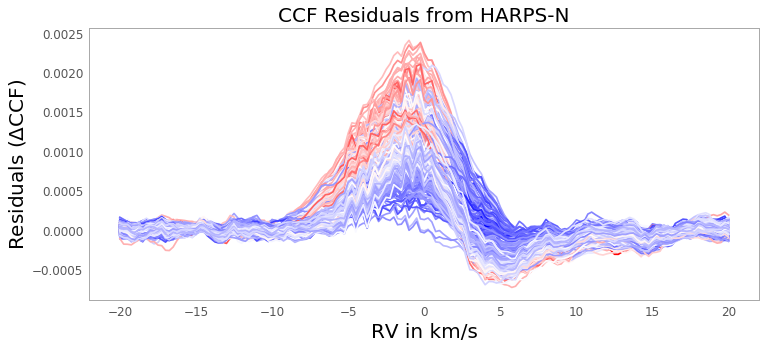

In [14]:
print(np.min(rv_non_zero_list), np.max(rv_non_zero_list))
min_rv = np.min(rv_non_zero_list)
max_rv = np.max(rv_non_zero_list)
cscale_residuals = (np.array(np.abs(rv_non_zero_list)) -min_rv)/ (max_rv-min_rv)
print(np.min(cscale_residuals), np.max(cscale_residuals))

col = plt.cm.jet([0.25,0.75])
n = len(rv_non_zero_list)
colors = plt.cm.bwr(cscale_residuals)

ccf_list_residuals = residuals_all
fig, ax = plt.subplots(figsize=(12, 5))

rv_data = np.linspace(-20, 20, 161)
#print(ccf_list[5])
#rv_list[5] is centered at 0.0

col = plt.cm.jet([0.25,0.75])
n = len(ccf_list_residuals)
colors = plt.cm.bwr(cscale_residuals)


#for i in range(0,len(ccf_list)):

for i in range(0,len(ccf_list_residuals)):
    #for i in range(0,629):
    #if rv_non_zero_list[i]-np.mean(rv_non_zero_list) < -0.0029:
    #print(i)
    if i != 544:
        ax.plot(rv_data, CCF_array_all[i]-CCF_array_all[544], color = colors[i])
        ax.grid(False)
# 400, 468, 505        
#i = 468
#ax.plot(rv_data, CCF_array_all[i]-CCF_array_all[544], color = colors[i])
#print(BJD_list[i])

ax.set_xlabel('RV in km/s', size=20)
ax.set_ylabel('Residuals ($\Delta$CCF)', size=20)
ax.set_title("CCF Residuals from HARPS-N", size =20)
#fig.colorbar(rv_list)

(array([  2.,  37., 142., 195., 140.,  72.,  27.,   8.,   4.,   2.]),
 array([-4.27696627, -3.15413133, -2.03129639, -0.90846145,  0.21437349,
         1.33720843,  2.46004337,  3.58287831,  4.70571325,  5.82854819,
         6.95138313]),
 <a list of 10 Patch objects>)

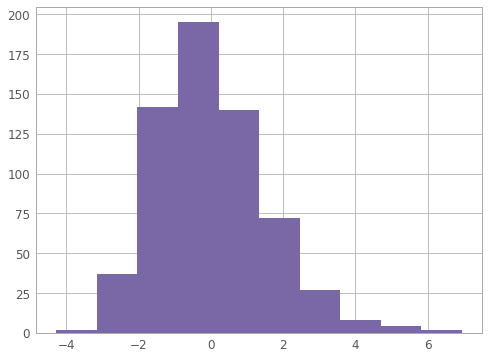

In [26]:
scaled_rv_non_zero_list= (rv_non_zero_list-np.mean(rv_non_zero_list))*1000
plt.hist(rv_non_zero_list-np.mean(rv_non_zero_list))
plt.hist(scaled_rv_non_zero_list)

57283.06230172413
57820.02410634512
58207.00862658179
58207.00862658179


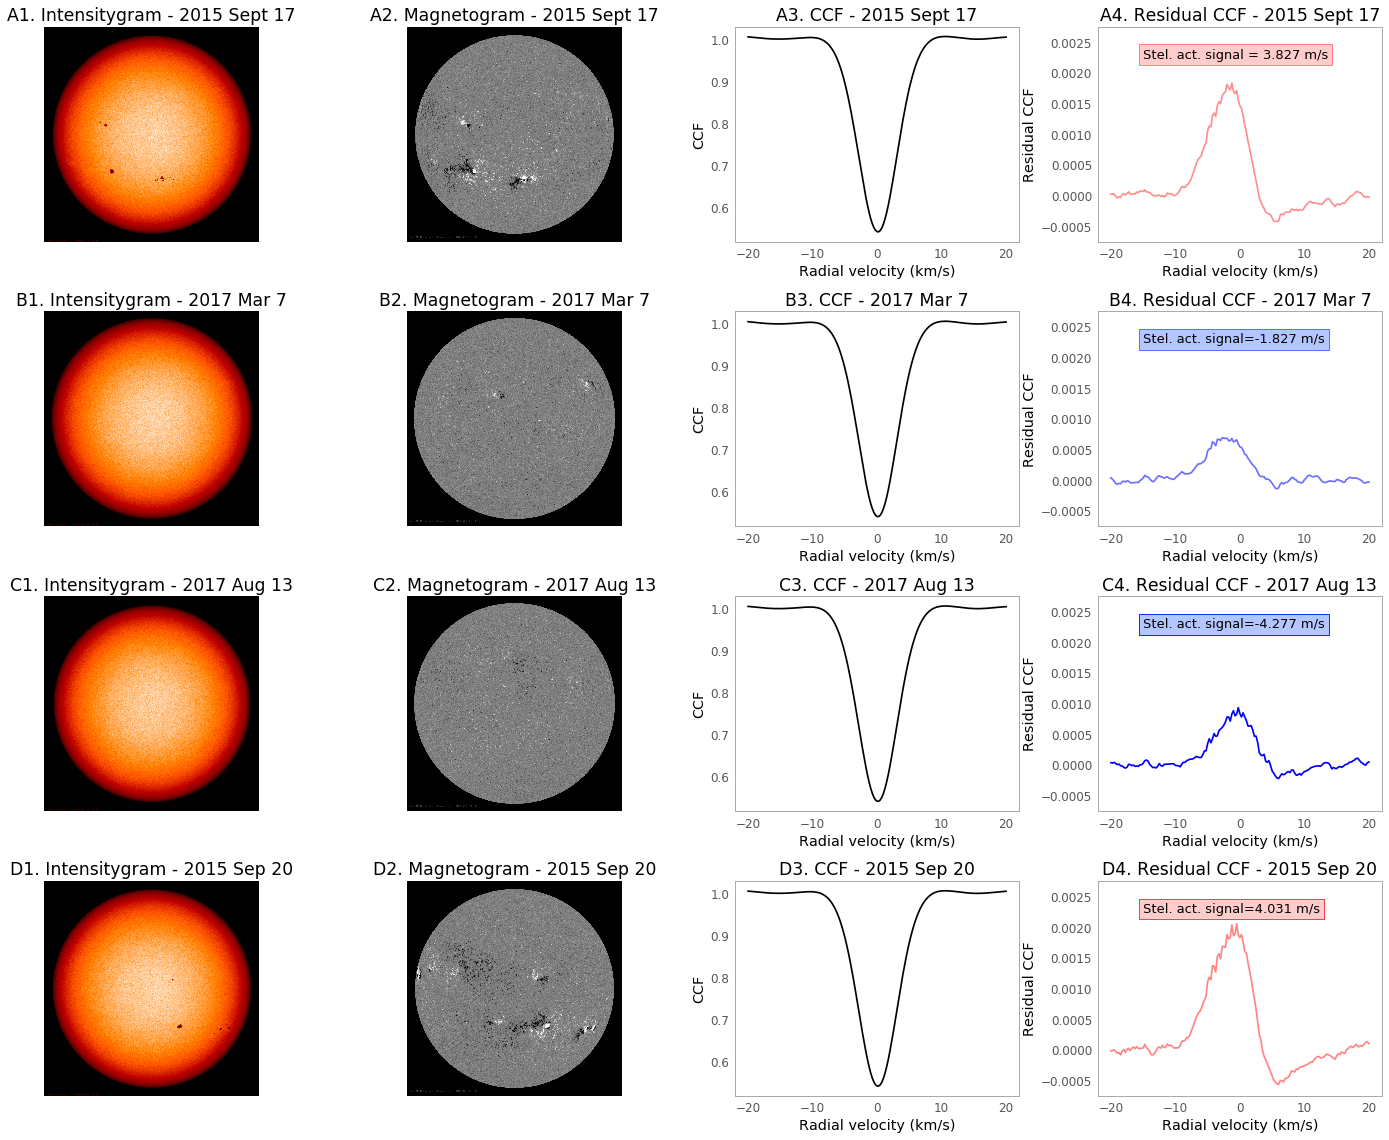

In [44]:
fig, axes = plt.subplots(4, 4, figsize=(20, 16))

# best quiet observation = CCF_array_all[544]

# Row 1 (2015/9/17)
print(BJD_list[36])
ax = axes[0][0]
ax.imshow(image20150917_bw_L)
ax.grid(False)
ax.axis('off')
ax.set_title("A1. Intensitygram - 2015 Sept 17")

ax = axes[0][1]
ax.imshow(image20150917_mg, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("A2. Magnetogram - 2015 Sept 17")

ax2 = axes[0][2]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[36], color='k')
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("A3. CCF - 2015 Sept 17")

ax3 = axes[0][3]
rv_data = np.linspace(-20, 20, 161)
ax3.plot(rv_data,CCF_array_all[36]-CCF_array_all[544], color = colors[36])
ax3.set_ylabel("Residual CCF")
ax3.set_xlabel("Radial velocity (km/s)")
ax3.set_ylim(-0.00075, 0.00275)
textstr = '\n'.join((
      r'Stel. act. signal = %.3f m/s' % (scaled_rv_non_zero_list[36], ),))
ax3.text(-15, 0.0024, textstr, size=13,
          ha="left", va="top",
          bbox=dict(boxstyle="square",
                    ec=(1., 0.5, 0.5),
                    fc=(1., 0.8, 0.8),
                    ))
ax3.grid(False)
ax3.set_title("A4. Residual CCF - 2015 Sept 17")
#ax3.set_ylim(-0.0005, 0.002)



# Row 2 (3/7/2017) 
print (BJD_list[361])

ax1 = axes[1][0]
ax1.imshow(image20170307_bw_L)
ax1.grid(False)
ax1.axis('off')
ax1.set_title("B1. Intensitygram - 2017 Mar 7")

ax = axes[1][1]
ax.imshow(image20170307_mg_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("B2. Magnetogram - 2017 Mar 7")

ax2 = axes[1][2]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[361], color='k')
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("B3. CCF - 2017 Mar 7")

ax4 = axes[1][3]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[361]-CCF_array_all[544], color = colors[361])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.set_ylim(-0.00075, 0.00275)
textstr = '\n'.join((
      r'Stel. act. signal=%.3f m/s' % (scaled_rv_non_zero_list[361], ),))
ax4.text(-15, 0.0024, textstr, size=13,
          ha="left", va="top",
          bbox=dict(boxstyle="square",
                    ec=(77/255, 121/255, 255/255),
                    fc=(179/255, 198/255, 255/255),
                    ))
ax4.grid(False)
ax4.set_title("B4. Residual CCF - 2017 Mar 7")

# row 3, August 13, 2017

print(BJD_list[544])


ax6 = axes[2][0]
ax6.imshow(image20170813_bw_L)
ax6.grid(False)
ax6.axis('off')
ax6.set_title("C1. Intensitygram - 2017 Aug 13")

ax = axes[2][1]
ax.imshow(image20170813_mg_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("C2. Magnetogram - 2017 Aug 13")


ax2 = axes[2][2]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[468], color='k')
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("C3. CCF - 2017 Aug 13")

ax4 = axes[2][3]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[468]-CCF_array_all[544], color = colors[468])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.set_ylim(-0.00075, 0.00275)
textstr = '\n'.join((
      r'Stel. act. signal=%.3f m/s' % (scaled_rv_non_zero_list[468], ),))
ax4.text(-15, 0.0024, textstr, size=13,
          ha="left", va="top",
          bbox=dict(boxstyle="square",
                    ec=(0/255, 55/255, 255/255),
                    fc=(179/255, 198/255, 255/255),
                    ))
ax4.grid(False)
ax4.set_title("C4. Residual CCF - 2017 Aug 13")


# Row 4


ax6 = axes[3][0]
ax6.imshow(image20180329_bw_L)
ax6.grid(False)
ax6.axis('off')
ax6.set_title("D1. Intensitygram - 2015 Sep 20")

ax = axes[3][1]
ax.imshow(image20150920_mg_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("D2. Magnetogram - 2015 Sep 20")


ax2 = axes[3][2]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[39], color='k')
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("D3. CCF - 2015 Sep 20")

ax4 = axes[3][3]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[39]-CCF_array_all[544], color = colors[39])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("D4. Residual CCF - 2015 Sep 20")
ax4.set_ylim(-0.00075, 0.00275)
#rms_x =3.00
textstr = '\n'.join((
      r'Stel. act. signal=%.3f m/s' % (scaled_rv_non_zero_list[39], ),))
ax4.text(-15, 0.0024, textstr, size=13,
          ha="left", va="top",
          bbox=dict(boxstyle="square",
                    ec=(245/255, 66/255, 87/255),
                    fc=(1., 0.8, 0.8),
                    ))
#ax4.legend(loc="lower right")

print(BJD_list[544])

plt.tight_layout()


57820.02410634512
58207.00862658179
57979.06117896817


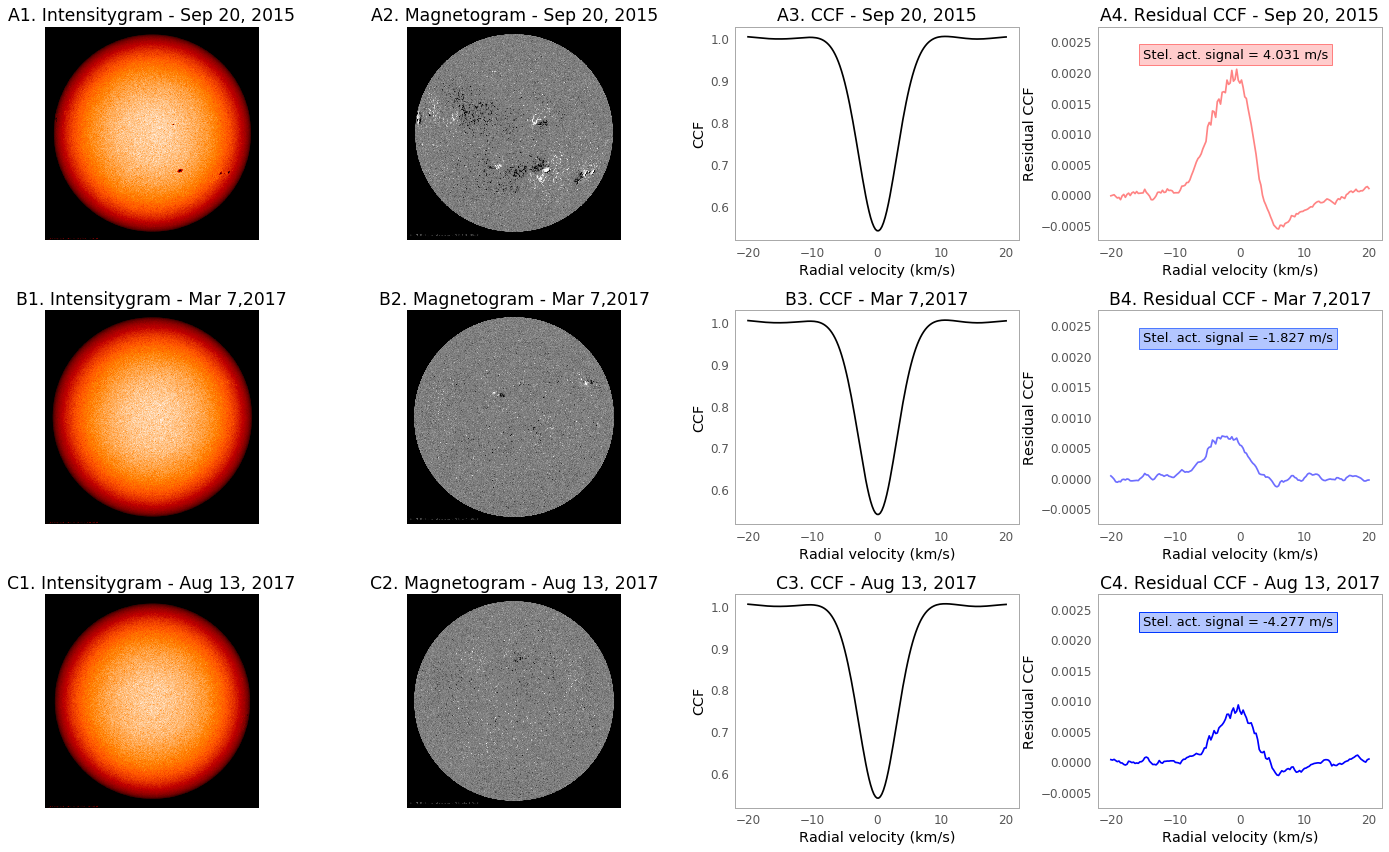

In [26]:
fig, axes = plt.subplots(3, 4, figsize=(20, 12))

# best quiet observation = CCF_array_all[544]


# Row 4


ax6 = axes[0][0]
ax6.imshow(image20180329_bw_L)
ax6.grid(False)
ax6.axis('off')
ax6.set_title("A1. Intensitygram - Sep 20, 2015")

ax = axes[0][1]
ax.imshow(image20150920_mg_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("A2. Magnetogram - Sep 20, 2015")


ax2 = axes[0][2]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[39], color='k')
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("A3. CCF - Sep 20, 2015")

ax4 = axes[0][3]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[39]-CCF_array_all[544], color = colors[39])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("A4. Residual CCF - Sep 20, 2015")
ax4.set_ylim(-0.00075, 0.00275)
textstr = '\n'.join((
      r'Stel. act. signal = %.3f m/s' % (scaled_rv_non_zero_list[39], ),))
ax4.text(-15, 0.0024, textstr, size=13,
          ha="left", va="top",
          bbox=dict(boxstyle="square",
                    ec=(1., 0.5, 0.5),
                    fc=(1., 0.8, 0.8),
                    ))

# Row 2 (3/7/2017) 
print (BJD_list[361])

ax1 = axes[1][0]
ax1.imshow(image20170307_bw_L)
ax1.grid(False)
ax1.axis('off')
ax1.set_title("B1. Intensitygram - Mar 7,2017")

ax = axes[1][1]
ax.imshow(image20170307_mg_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("B2. Magnetogram - Mar 7,2017")

ax2 = axes[1][2]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[361], color='k')
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("B3. CCF - Mar 7,2017")

ax4 = axes[1][3]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[361]-CCF_array_all[544], color = colors[361])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("B4. Residual CCF - Mar 7,2017")
ax4.set_ylim(-0.00075, 0.00275)
textstr = '\n'.join((
      r'Stel. act. signal = %.3f m/s' % (scaled_rv_non_zero_list[361], ),))
ax4.text(-15, 0.0024, textstr, size=13,
          ha="left", va="top",
          bbox=dict(boxstyle="square",
                    ec=(77/255, 121/255, 255/255),
                    fc=(179/255, 198/255, 255/255),
                    ))


# row 3, August 13, 2017

print(BJD_list[544])


ax6 = axes[2][0]
ax6.imshow(image20170813_bw_L)
ax6.grid(False)
ax6.axis('off')
ax6.set_title("C1. Intensitygram - Aug 13, 2017")

ax = axes[2][1]
ax.imshow(image20170813_mg_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("C2. Magnetogram - Aug 13, 2017")


ax2 = axes[2][2]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[468], color='k')
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("C3. CCF - Aug 13, 2017")

ax4 = axes[2][3]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[468]-CCF_array_all[544], color = colors[468])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("C4. Residual CCF - Aug 13, 2017")
ax4.set_ylim(-0.00075, 0.00275)
textstr = '\n'.join((
      r'Stel. act. signal = -%.3f m/s' % (np.abs(scaled_rv_non_zero_list[468]), ),))
ax4.text(-15, 0.0024, textstr, size=13,
          ha="left", va="top",
          bbox=dict(boxstyle="square",
                    ec=(0/255, 55/255, 255/255),
                    fc=(179/255, 198/255, 255/255),
                    ))
print(BJD_list[468])

plt.tight_layout()
plt.savefig('demo.png', transparent=True)

57820.02410634512
58207.00862658179
58207.00862658179


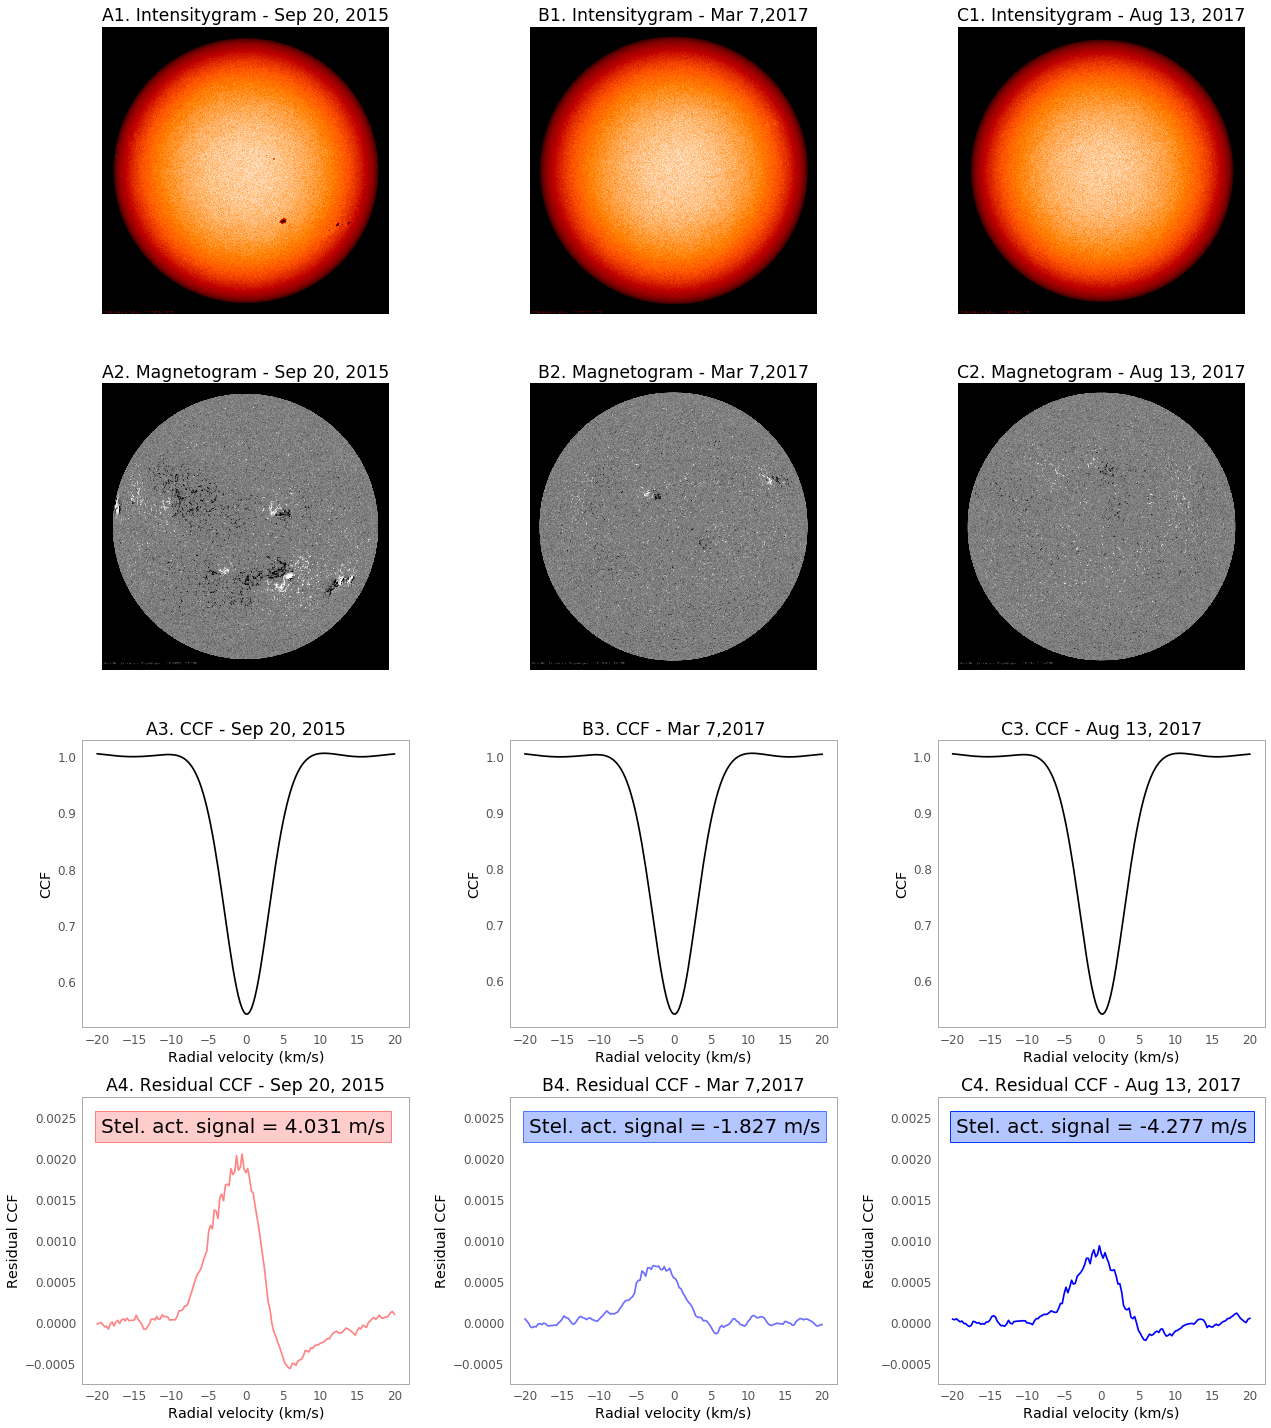

In [27]:
# 90 degree switch

fig, axes = plt.subplots(4, 3, figsize=(18, 20))

# best quiet observation = CCF_array_all[544]


# Column 1

ax6 = axes[0][0]
ax6.imshow(image20180329_bw_L)
ax6.grid(False)
ax6.axis('off')
ax6.set_title("A1. Intensitygram - Sep 20, 2015")

ax = axes[1][0]
ax.imshow(image20150920_mg_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("A2. Magnetogram - Sep 20, 2015")


ax2 = axes[2][0]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[39], color='k')
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("A3. CCF - Sep 20, 2015")

ax4 = axes[3][0]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[39]-CCF_array_all[544], color = colors[39])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("A4. Residual CCF - Sep 20, 2015")
ax4.set_ylim(-0.00075, 0.00275)
textstr = '\n'.join((
      r'Stel. act. signal = %.3f m/s' % (scaled_rv_non_zero_list[39], ),))
ax4.text(-19.5, 0.0025, textstr, size=20,
          ha="left", va="top",
          bbox=dict(boxstyle="square",
                    ec=(1., 0.5, 0.5),
                    fc=(1., 0.8, 0.8),
                    ))

# Row 2 (3/7/2017) 
print (BJD_list[361])

ax1 = axes[0][1]
ax1.imshow(image20170307_bw_L)
ax1.grid(False)
ax1.axis('off')
ax1.set_title("B1. Intensitygram - Mar 7,2017")

ax = axes[1][1]
ax.imshow(image20170307_mg_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("B2. Magnetogram - Mar 7,2017")

ax2 = axes[2][1]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[361], color='k')
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("B3. CCF - Mar 7,2017")

ax4 = axes[3][1]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[361]-CCF_array_all[544], color = colors[361])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("B4. Residual CCF - Mar 7,2017")
ax4.set_ylim(-0.00075, 0.00275)
textstr = '\n'.join((
      r'Stel. act. signal = %.3f m/s' % (scaled_rv_non_zero_list[361], ),))
ax4.text(-19.5, 0.0025, textstr, size=20,
          ha="left", va="top",
          bbox=dict(boxstyle="square",
                    ec=(77/255, 121/255, 255/255),
                    fc=(179/255, 198/255, 255/255),
                    ))


# row 3, August 13, 2017

print(BJD_list[544])


ax6 = axes[0][2]
ax6.imshow(image20170813_bw_L)
ax6.grid(False)
ax6.axis('off')
ax6.set_title("C1. Intensitygram - Aug 13, 2017")

ax = axes[1][2]
ax.imshow(image20170813_mg_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("C2. Magnetogram - Aug 13, 2017")


ax2 = axes[2][2]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[468], color='k')
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("C3. CCF - Aug 13, 2017")

ax4 = axes[3][2]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[468]-CCF_array_all[544], color = colors[468])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("C4. Residual CCF - Aug 13, 2017")
ax4.set_ylim(-0.00075, 0.00275)
textstr = '\n'.join((
      r'Stel. act. signal = -%.3f m/s' % (np.abs(scaled_rv_non_zero_list[468]), ),))
ax4.text(-19.5, 0.0025, textstr, size=20,
          ha="left", va="top",
          bbox=dict(boxstyle="square",
                    ec=(0/255, 55/255, 255/255),
                    fc=(179/255, 198/255, 255/255),
                    ))
print(BJD_list[544])

plt.tight_layout()
plt.savefig('demo.png', transparent=True)

In [25]:
179/255, 198/255, 255/255

(0.7019607843137254, 0.7764705882352941, 1.0)

In [26]:
for i in range(0, len(BJD_list)):
    if BJD_list[i] > 58317.50000:
        print(i)

628


-0.26894722275599
0.9867474839053147


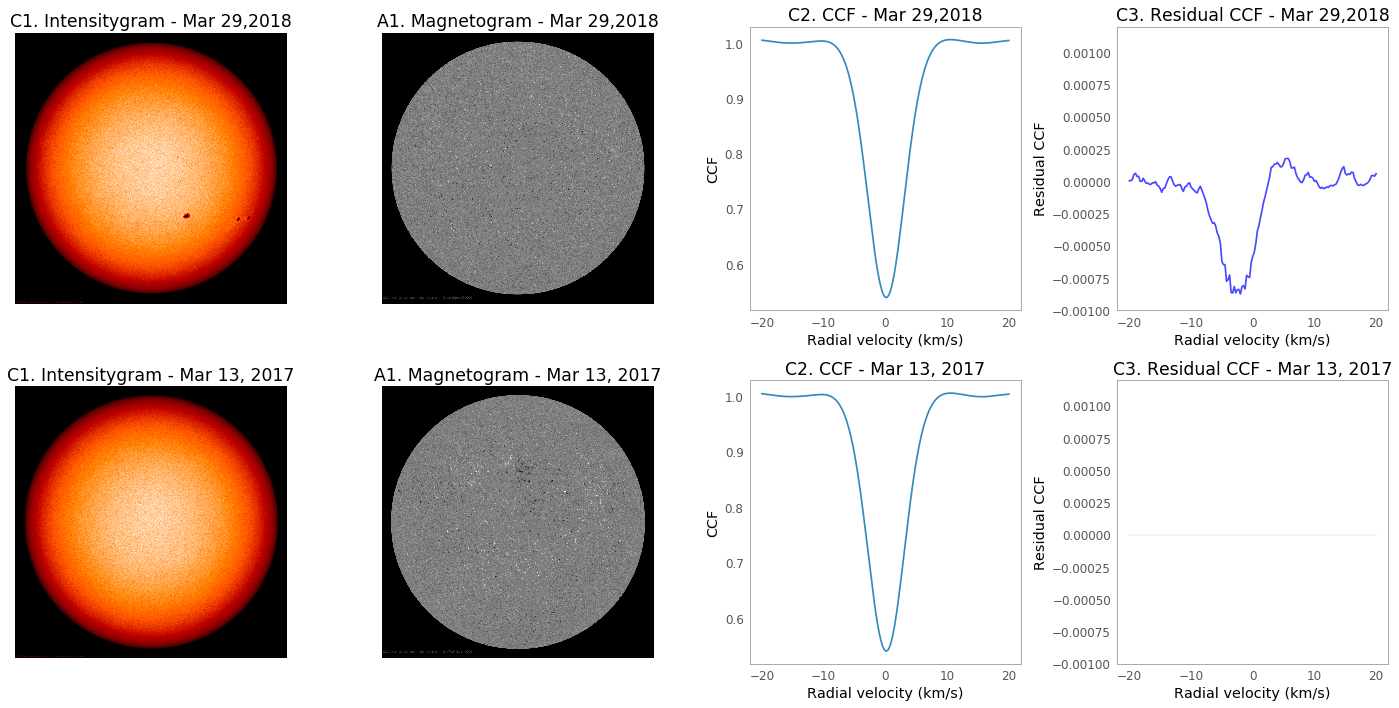

In [28]:
# Comparing "quiet" observations

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# row 3 (3/29/18)

print((rv_non_zero_list[544]-np.mean(rv_non_zero_list))*100)


ax6 = axes[0][0]
ax6.imshow(image20180329_bw_L)
ax6.grid(False)
ax6.axis('off')
ax6.set_title("C1. Intensitygram - Mar 29,2018")

ax = axes[0][1]
ax.imshow(image20180329_mg_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("A1. Magnetogram - Mar 29,2018")


ax2 = axes[0][2]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[544])
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("C2. CCF - Mar 29,2018")

ax4 = axes[0][3]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[544]-CCF_quiet, color = colors[544])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("C3. Residual CCF - Mar 29,2018")
ax4.set_ylim(-0.001, 0.0012)


# row 4 (3/29/18)

print((rv_non_zero_list[366]-np.mean(rv_non_zero_list))*1000)


ax6 = axes[1][0]
ax6.imshow(image3_13_17_bw_L)
ax6.grid(False)
ax6.axis('off')
ax6.set_title("C1. Intensitygram - Mar 13, 2017")

ax = axes[1][1]
ax.imshow(image20170313_bw_L, cmap="gray")
ax.grid(False)
ax.axis('off')
ax.set_title("A1. Magnetogram - Mar 13, 2017")


ax2 = axes[1][2]
rv_data = np.linspace(-20, 20, 161)
ax2.plot(rv_data,CCF_array_all[366])
ax2.set_ylabel("CCF")
ax2.set_xlabel("Radial velocity (km/s)")
ax2.grid(False)
ax2.set_title("C2. CCF - Mar 13, 2017")

ax4 = axes[1][3]
rv_data = np.linspace(-20, 20, 161)
ax4.plot(rv_data,CCF_array_all[366]-CCF_quiet, color = colors[366])
ax4.set_ylabel("Residual CCF")
ax4.set_xlabel("Radial velocity (km/s)")
ax4.grid(False)
ax4.set_title("C3. Residual CCF - Mar 13, 2017")
ax4.set_ylim(-0.001, 0.0012)



plt.tight_layout()

In [28]:
BJD_list[629]

IndexError: list index out of range

In [29]:
hdul_late = fits.open('shifted_fits/ccf629_PSI_.fits', memmap=False)
print(hdul_late[0].header['BJD'])

58319.04848716936


(array([  2.,  37., 142., 195., 140.,  72.,  27.,   8.,   4.,   2.]),
 array([-0.00427697, -0.00315413, -0.0020313 , -0.00090846,  0.00021437,
         0.00133721,  0.00246004,  0.00358288,  0.00470571,  0.00582855,
         0.00695138]),
 <a list of 10 Patch objects>)

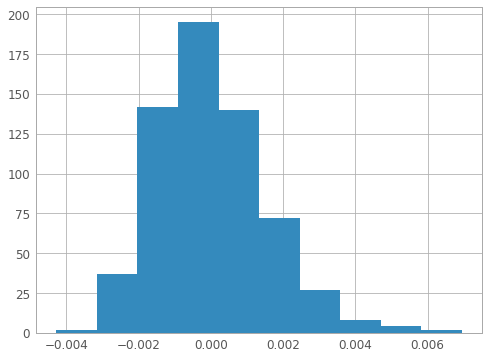

In [30]:
plt.hist(rv_non_zero_list- np.mean(rv_non_zero_list))

In [31]:
for i in range(0, len(BJD_list)):
    if BJD_list[i] < 57286.50000 +1 and BJD_list[i]> 57286.50000-1:
        print(i)

38


In [32]:
BJD_list[39]

57293.0368876125

In [335]:
file_pattern = np.linspace(0, 10)

data_files = tf.data.Dataset.list_files(file_pattern)
N = len(data_files)
for i in range(N):
    val_file = data_files[i]
    print(val_file)
    train_files = data_files[0:i] + data_files[i+1:]
    print(train_files)
    # Now you can create datasets that will read from those files

NameError: name 'tf' is not defined